In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle3"

In [ ]:
# %cd /content/drive/MyDrive/Kaggle3
# # !kaggle datasets download -d grassknoted/asl-alphabet
# # #!kaggle datasets download -d risangbaskoro/wlasl-processed
# !kaggle datasets download -d lexset/synthetic-asl-alphabet #

In [ ]:
# !unzip \*.zip # unzipping the datasets

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image


In [ ]:
import os
train_dir = '/content/drive/MyDrive/Kaggle3/Train_Alphabet/'
categories = os.listdir(train_dir)
len(categories)
# length of training images
length = 0
train_images_names_and_paths = {}

for cat in categories:
    train_images_names_and_paths[cat] = os.listdir(train_dir + '/' + cat)
    length += len(os.listdir(train_dir + '/' + cat))

print('Total Length of Training Images:', length)

Total Length of Training Images: 14797


In [ ]:
# Step 1: Load ASL Alphabet dataset
train_data_dir = '/content/drive/MyDrive/Kaggle3/Train_Alphabet/'
test_data_dir = '/content/drive/MyDrive/Kaggle3/Test_Alphabet/'


alternative start

Load Data

In [ ]:

# def load_and_preprocess_data(data_dir, batch_size):
#     datagen = ImageDataGenerator(
#         rescale=1./255,
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

#     train_data = datagen.flow_from_directory(
#         data_dir + '/Train_Alphabet',
#         target_size=(224, 224),
#         batch_size=batch_size,
#         class_mode='binary',
#         shuffle=True)

#     # val_data = datagen.flow_from_directory(
#     #     data_dir + '/val',
#     #     target_size=(224, 224),
#     #     batch_size=batch_size,
#     #     class_mode='binary',
#     #     shuffle=False)

#     test_data = datagen.flow_from_directory(
#         data_dir + '/Test_Alphabet',
#         target_size=(224, 224),
#         batch_size=batch_size,
#         class_mode='binary',
#         shuffle=False)

#     return train_data, test_data




In [ ]:
data_dir = '/content/drive/MyDrive/Kaggle3/'

In [ ]:
# batch_size = 32
# train_data, test_data = load_and_preprocess_data(data_dir, batch_size)

Model Initialization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG19
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg19 import preprocess_input


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# train_data_dir = '/content/drive/MyDrive/Kaggle3/Train_Alphabet/'
# test_data_dir = '/content/drive/MyDrive/Kaggle3/Test_Alphabet/'

# Initialize ImageDataGenerator for train and test data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(48, 48),
        batch_size=32,
        class_mode='categorical')

# Flow validation images in batches of 32 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(48, 48),
        batch_size=32,
        class_mode='categorical')

# Now you can use train_generator and test_generator for training and testing your model


Found 14797 images belonging to 27 classes.
Found 2700 images belonging to 27 classes.


In [ ]:
len(train_generator)

463

In [ ]:
len(test_generator)

85

In [ ]:

# Convert batches of data to NumPy arrays
num_batches = len(train_generator)
data_array = []
labels_array = []

for i in range(5):
    batch_data, batch_labels = next(train_generator)
    data_array.append(batch_data)
    labels_array.append(batch_labels)

# Concatenate the batches into a single NumPy array
data_array = np.concatenate(data_array)
labels_array = np.concatenate(labels_array)


In [ ]:
# Convert batches of data to NumPy arrays
test_batches = len(test_generator)
test_data_array = []
test_labels_array = []

for i in range(5):
    test_batch_data, test_batch_labels = next(test_generator)
    test_data_array.append(test_batch_data)
    test_labels_array.append(test_batch_labels)

# Concatenate the batches into a single NumPy array
test_data_array = np.concatenate(test_data_array)
test_labels_array = np.concatenate(test_labels_array)

In [ ]:
data_array.shape

(160, 48, 48, 3)

In [ ]:
type(data_array)

numpy.ndarray

In [ ]:
labels_array.shape

(160, 27)

In [ ]:
type(labels_array)

numpy.ndarray

In [ ]:
X, y = train_generator.next()

In [ ]:
X.shape

(32, 48, 48, 3)

In [ ]:
y.shape

(32, 27)

In [ ]:
# Get the first value of labels_array and its one-hot encoded values
label_index = 0
label = labels_array[label_index]
one_hot_encoded_label = labels_array[label_index]

# Print the original label
print("Original label:", label)

# Print the one-hot encoded values
print("One-hot encoded label:", one_hot_encoded_label)


Original label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
One-hot encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [ ]:
# Determine the number of samples in your dataset
num_samples = labels_array.shape[0]

# Reshape labels_array to have shape (num_samples,)
labels_array = labels_array.argmax(axis=1)


In [ ]:
# Determine the number of samples in your dataset
num_samples = labels_array.shape[0]

In [ ]:
labels_array.shape

(160,)

In [ ]:
# Reshape and normalize data
# x_train = data_array.reshape(160, 48, 48, 1).astype("float32") / 255

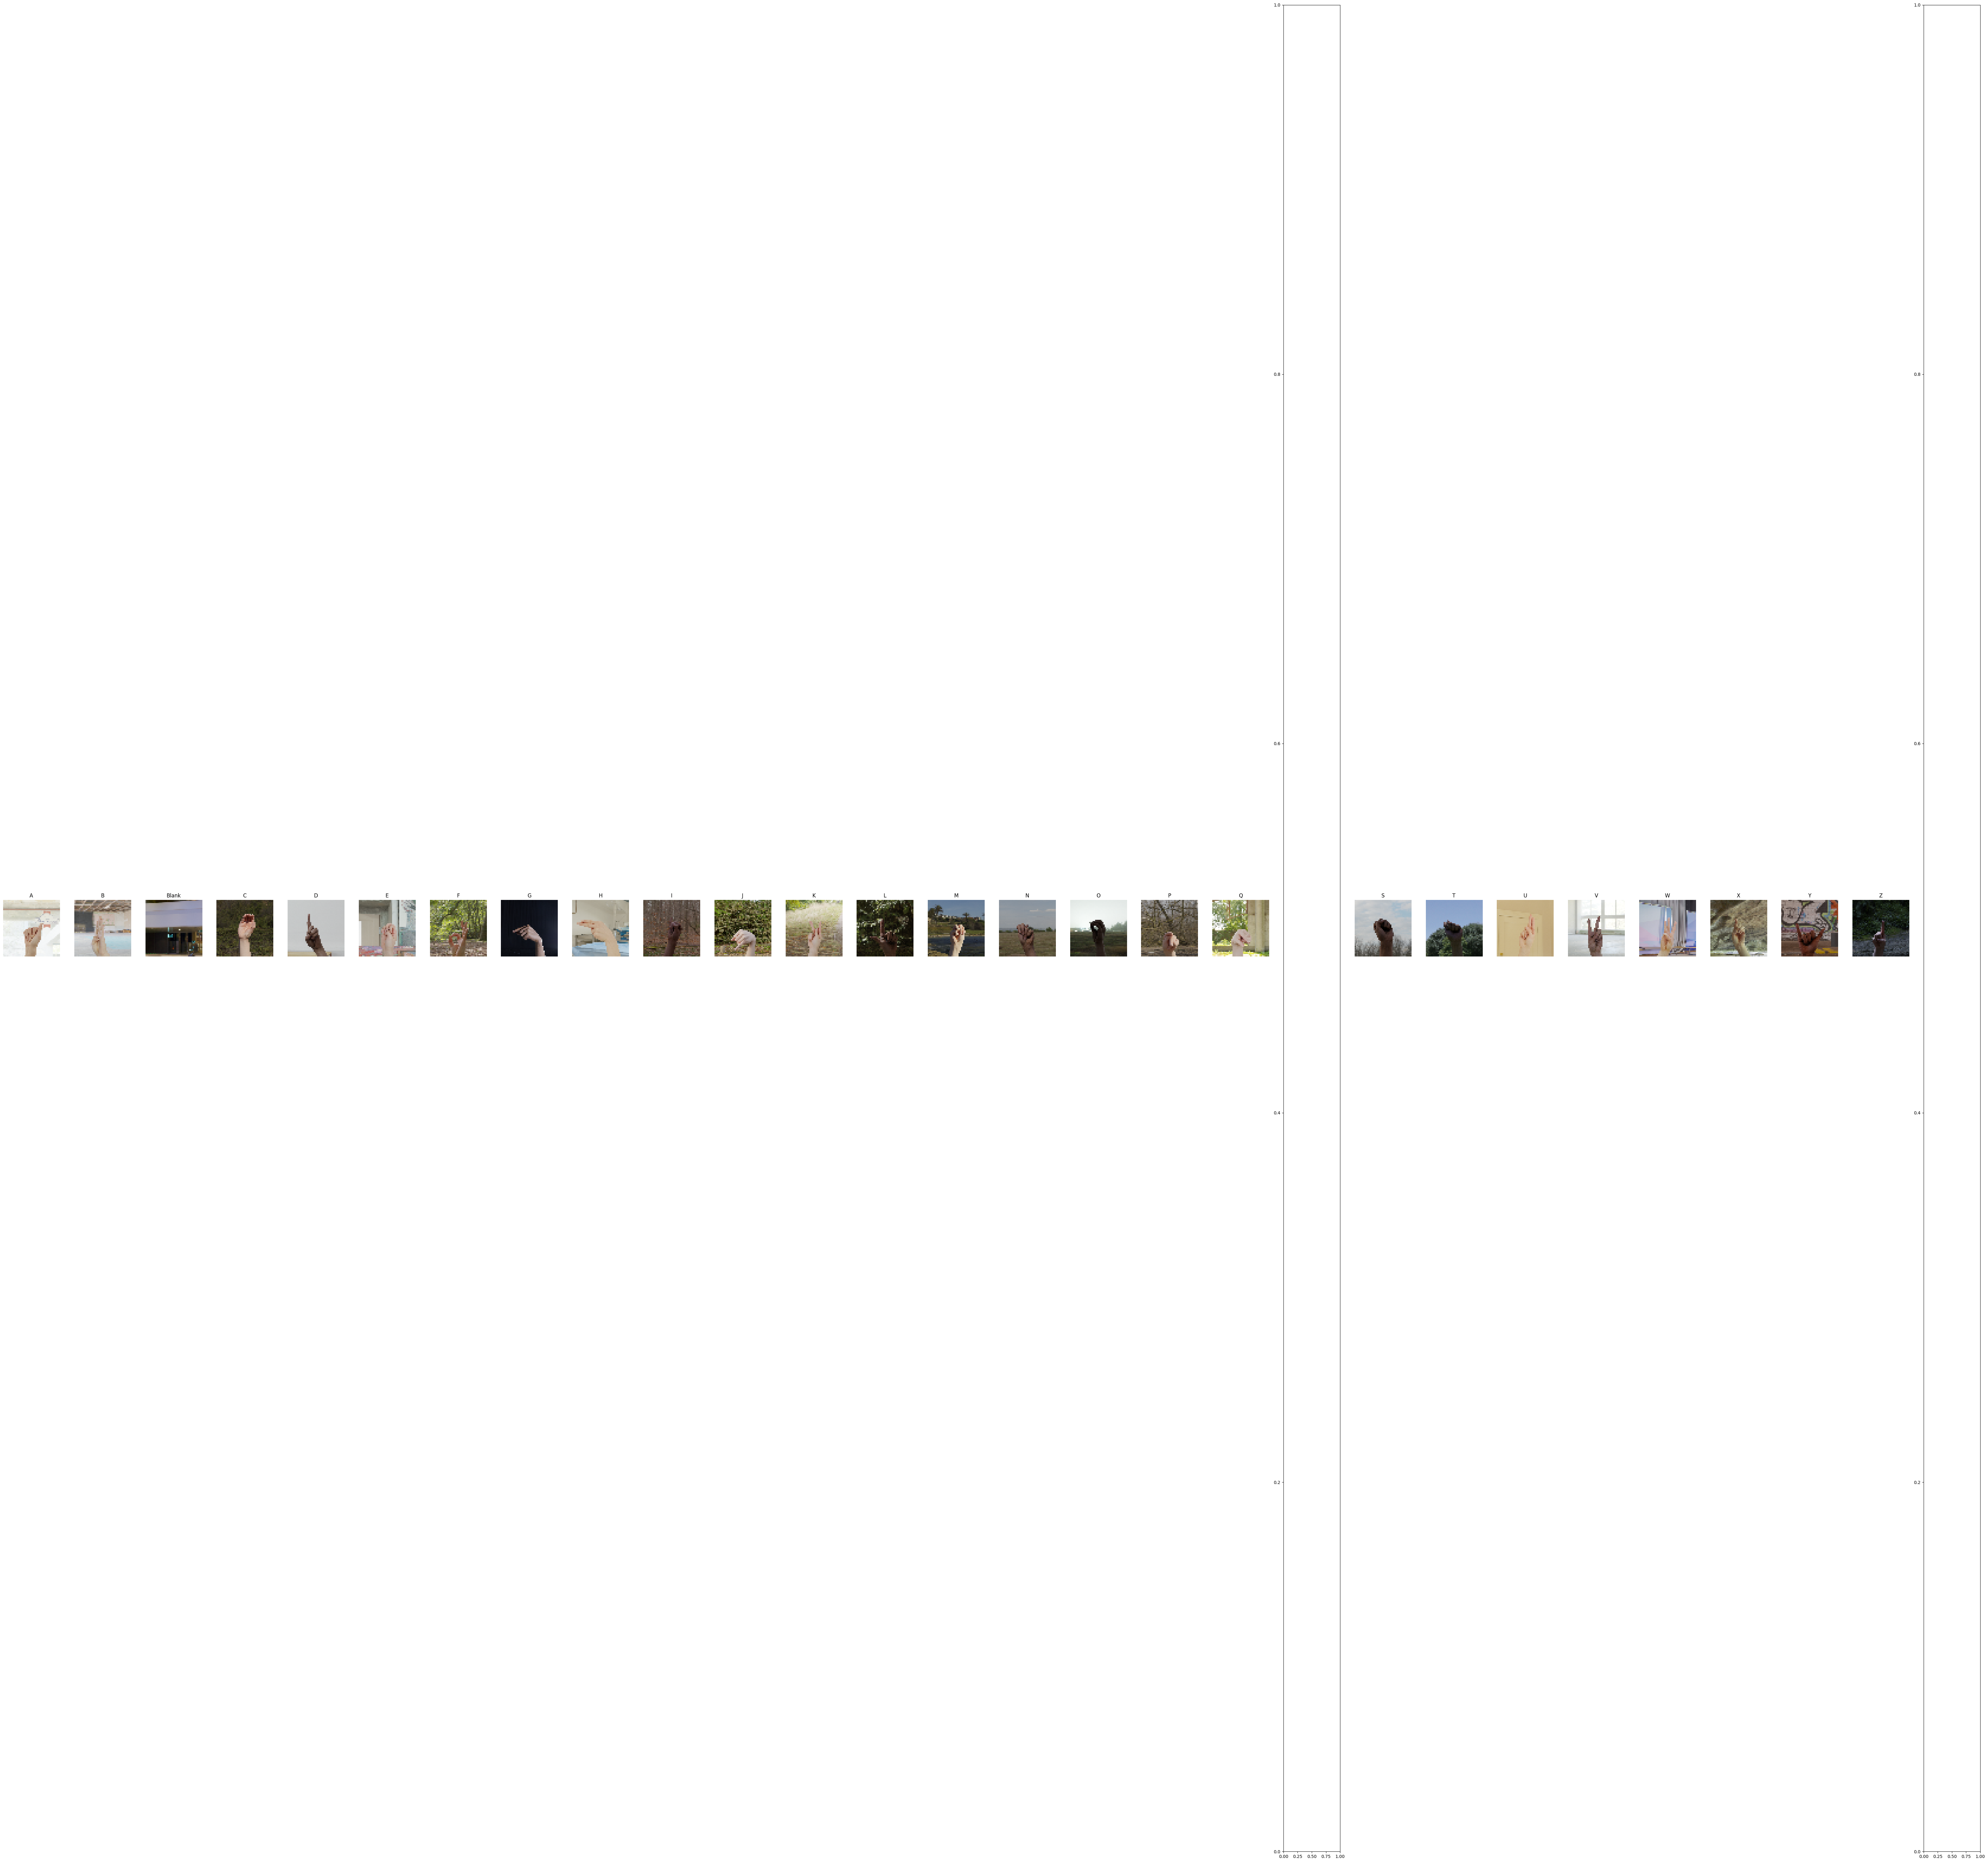

In [ ]:
# Name each one of the classes
class_names = ['A', 'B', 'Blank', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Save an example for each category in a dict
images_dict = dict()
for i, l in enumerate(labels_array):
  if len(images_dict)==27:
    break
  if l not in images_dict:
    images_dict[l] = data_array[i]

# Function to plot images
def plot_categories(images):
  fig, axes = plt.subplots(1, 28, figsize=(64, 60))
  axes = axes.flatten()

  # Plot an empty canvas
  ax = axes[0]
  dummy_array = np.array([[[0, 0, 0, 0]]], dtype='uint8')
  ax.set_title("reference")
  ax.set_axis_off()
  ax.imshow(dummy_array, interpolation='nearest')

  # Plot an image for every category
  for k,v in images.items():
    ax = axes[k]
    ax.imshow(v, cmap=plt.cm.binary)
    ax.set_title(f"{class_names[k]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()


# Use the function to plot
plot_categories(images_dict)



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for Dense layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(27, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=10,
      validation_data=test_generator,
      validation_steps=test_generator.samples // test_generator.batch_size)


Epoch 1/10
759/759 [==============================] - 7182s 9s/step - loss: 1.5241 - accuracy: 0.5530 - val_loss: 0.4646 - val_accuracy: 0.8683
Epoch 2/10
759/759 [==============================] - 646s 851ms/step - loss: 0.3327 - accuracy: 0.9035 - val_loss: 0.2818 - val_accuracy: 0.9085
Epoch 3/10
759/759 [==============================] - 615s 810ms/step - loss: 0.1723 - accuracy: 0.9478 - val_loss: 0.1868 - val_accuracy: 0.9498
Epoch 4/10
759/759 [==============================] - 608s 801ms/step - loss: 0.0991 - accuracy: 0.9692 - val_loss: 0.1630 - val_accuracy: 0.9487
Epoch 5/10
759/759 [==============================] - 604s 795ms/step - loss: 0.0604 - accuracy: 0.9822 - val_loss: 0.1503 - val_accuracy: 0.9542
Epoch 6/10
759/759 [==============================] - 608s 801ms/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.1504 - val_accuracy: 0.9576
Epoch 7/10
759/759 [==============================] - 603s 795ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.1599 - v

In [ ]:
base_model = VGG19(weights='imagenet', include_top=# Convert batches of data to NumPy arrays
test_batches = len(test_generator)
test_data_array = []
test_labels_array = []

for i in range(5):
    test_batch_data, test_batch_labels = next(test_generator)
    test_data_array.append(test_batch_data)
    test_labels_array.append(test_batch_labels)

# Concatenate the batches into a single NumPy array
test_data_array = np.concatenate(test_data_array)
test_labels_array = np.concatenate(test_labels_array)False, input_shape=(48, 48, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/Kaggle3/detect.keras')

In [ ]:
# Take a random sample of 5000 training images
background = data_array[np.random.choice(data_array.shape[0], 100, replace=False)]

# Use DeepExplainer to explain predictions of the model
e = shap.DeepExplainer(model, background)

# Compute shap values
# shap_values = e.shap_values(x_test[1:5])


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:
shap_values = e.shap_values(test_data_array[1:5])

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


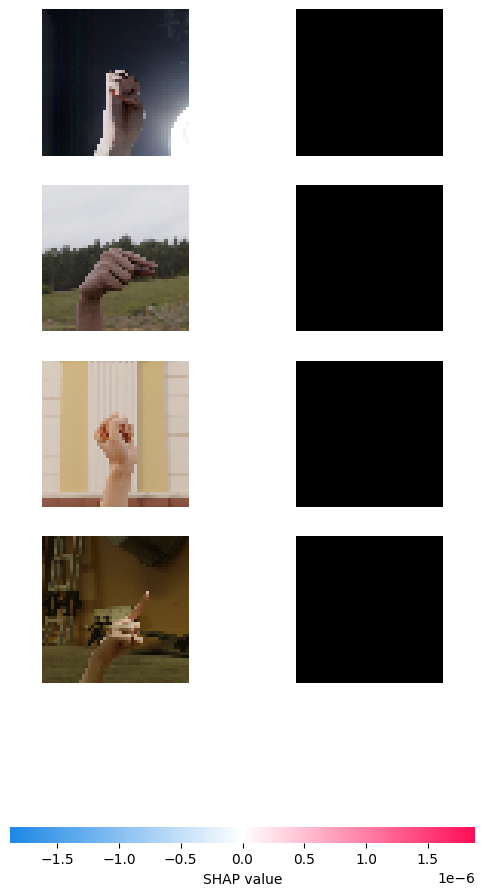

In [ ]:
# plot the feature attributions
shap.image_plot(shap_values, test_data_array[1:5])

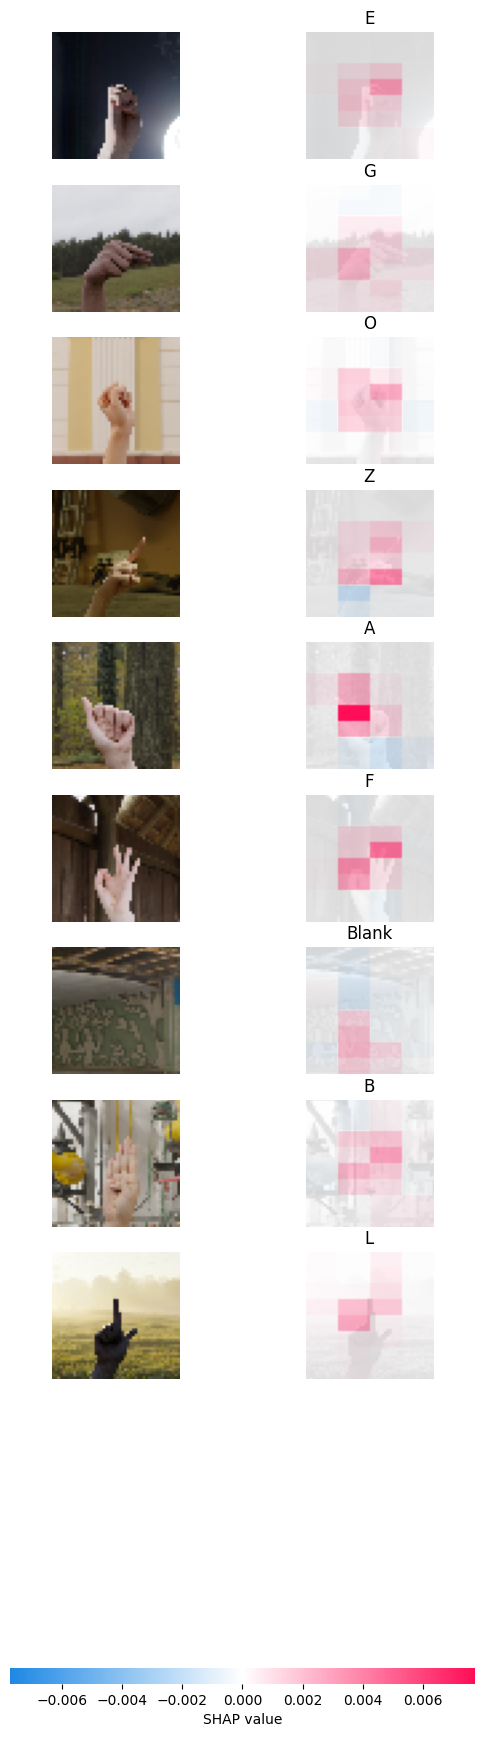

In [ ]:

# Define the ImageMasker with the appropriate image shape
masker = shap.maskers.Image(shape=(48, 48, 3), mask_value=0)

#

def f(X):
    tmp = X.copy()
    return model(tmp)




output_names = ['A', 'B', 'Blank', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Create the explainer with the ImageMasker
explainer = shap.Explainer(f, masker, output_names=output_names)



shap_values = explainer(
    test_data_array[1:10], max_evals=100, batch_size=32, outputs=shap.Explanation.argsort.flip[:1]
)
shap.image_plot(shap_values)

In [ ]:
# history = model.fit(train_generator, epochs=5, batch_size=32, validation_data=validation_generator)


alternative end

VISUALISATION

In [ ]:
# import os
# import cv2
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Step 1: Define data directory
# data_dir = '/content/drive/MyDrive/Kaggle3/Train_Alphabet/'

# # Step 2: Visualize sample images
# sample_images = []
# sample_labels = []

# for root, dirs, files in os.walk(data_dir):
#     for directory in dirs:
#         label = directory
#         for filename in os.listdir(os.path.join(root, directory)):
#             if filename.endswith('.png'):
#                 image_path = os.path.join(root, directory, filename)
#                 sample_image = cv2.imread(image_path)
#                 if sample_image is not None:  # Check if image is loaded successfully
#                     sample_images.append(sample_image)
#                     sample_labels.append(label)
#                 else:
#                     print(f"Warning: Unable to load image '{image_path}'")

# # Plot sample images
# plt.figure(figsize=(12, 6))
# for i in range(min(10, len(sample_images))):  # Ensure there are at least 10 images to plot
#     plt.subplot(2, 5, i + 1)
#     plt.imshow(cv2.cvtColor(sample_images[i], cv2.COLOR_BGR2RGB))
#     plt.title(sample_labels[i])
#     plt.axis('off')
# plt.tight_layout()
# plt.show()

# # Step 3: Analyze class distribution
# plt.figure(figsize=(12, 6))
# sns.countplot(y=sample_labels, order=np.unique(sample_labels))
# plt.title('Class Distribution')
# plt.xlabel('Count')
# plt.ylabel('Class')
# plt.show()


In [ ]:
import os
import cv2
import numpy as np

def load_and_preprocess_images(data_dir):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                if filename.endswith('.png'):
                    image_path = os.path.join(label_dir, filename)
                    # Check if the image is loaded successfully
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
                    if image is not None:  # Ensure image is not empty
                        image = cv2.resize(image, (224, 224))  # Resize image to (224, 224)
                        images.append(image)
                        labels.append(label)
                    else:
                        print(f"Warning: Unable to load image '{image_path}'")
    return np.array(images), np.array(labels)

In [ ]:
# Step 3: Load and preprocess training and testing images
X_train, y_train = load_and_preprocess_images(train_data_dir)

In [ ]:
del(X_train1)

In [ ]:
np.save('X_train.npy',X_train)

In [ ]:
# np.load('X_train.npy')

In [ ]:
# import gc

# # Perform memory cleanup
# gc.collect()

In [ ]:
# ! nvidia-smi

In [ ]:
# # Step 4: Build the VGG19 model
# vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.layers import Input  # Add this line to import the Input layer


input_tensor = Input(shape=(224, 224, 1))  # Define input tensor with 1 channel (grayscale)
vgg_model = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)


In [ ]:
# Step 5: Extract features using VGG19
X_train_features = vgg_model.predict(X_train1)
#np.save('X_train_features.npy', vgg_model.predict(X_train))

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "vgg19" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 1, 224, 224, 3)


In [ ]:
#np.save('X_train_features.npy', X_train_features)


In [ ]:
X_train_features = np.load('X_train_features.npy')

In [ ]:
X_test_features = vgg_model.predict(X_test)

In [ ]:
np.save('X_test_features.npy', X_test_features)

In [ ]:
X_test_features = np.load('X_test_features.npy')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/Kaggle3/detect.keras')

In [ ]:
# Verify model loading
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.5 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np

In [ ]:
# Define the ImageMasker with the appropriate image shape
masker = shap.maskers.Image(shape=(48, 48, 3), mask_value=0)


def f(X):
    tmp = X.copy()
    return model(tmp)




output_names = ['A', 'B', 'Blank', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Create the explainer with the ImageMasker
explainer = shap.Explainer(f, masker, output_names=output_names)



shap_values = explainer(
    test_generator[1:10], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1]
)
shap.image_plot(shap_values)

TypeError: '>=' not supported between instances of 'slice' and 'int'

In [ ]:
# Get a batch of data from the generator
batch_size = 10
test_batch = [next(test_generator) for _ in range(batch_size)]

# Compute SHAP values for the test batch
shap_values = explainer(
    np.array(test_batch), max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1]
)

# Plot the SHAP values
shap.image_plot(shap_values)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (10, 2, 32) + inhomogeneous part.

In [ ]:
print(type(test_batch[0]))


<class 'tuple'>


In [ ]:
print(type(train_data_dir))

<class 'str'>
